In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn Data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.sample(5).T

,2510,6461,3535,4006,16
customerID,3707-GNWHM,0419-YAAPX,3612-YUNGG,2607-DHDAK,8191-XWSZG
gender,Male,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,No,Yes,Yes,Yes,No
Dependents,No,No,Yes,Yes,No
tenure,1,49,64,72,52
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,No,Yes,No,No
InternetService,Fiber optic,Fiber optic,Fiber optic,No,No
OnlineSecurity,No,No,No,No internet service,No internet service


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [10]:
df.drop(columns = ['customerID'] , inplace = True)

#  EDA + Data Cleaning


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Churn'] = encoder.fit_transform(df['Churn'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

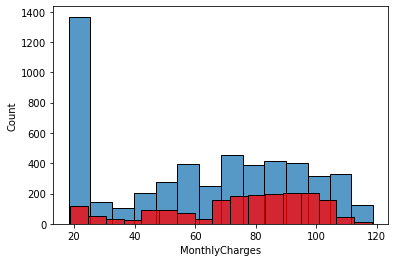

In [13]:
sns.histplot(df[df['Churn'] ==0]['MonthlyCharges'])
sns.histplot(df[df['Churn'] ==1]['MonthlyCharges'] , color='red')

In [14]:
categorical = []
numerical = []
for i in df:
    if df[i].dtype == 'object' :
        categorical.append(i)
    else:
        numerical.append(i)
    

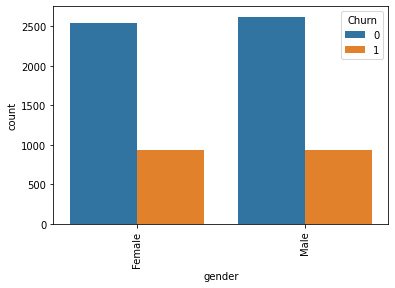

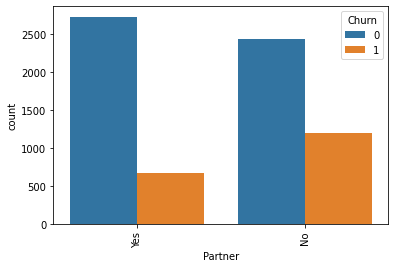

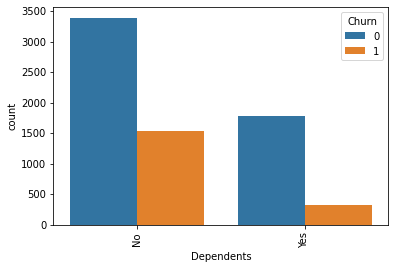

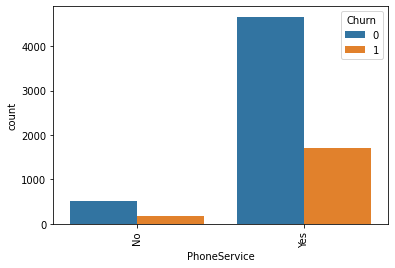

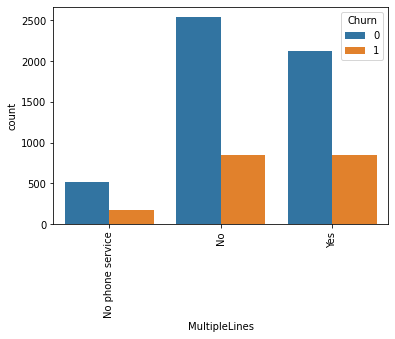

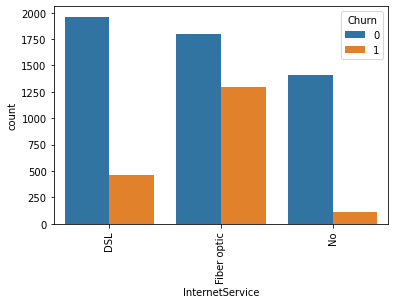

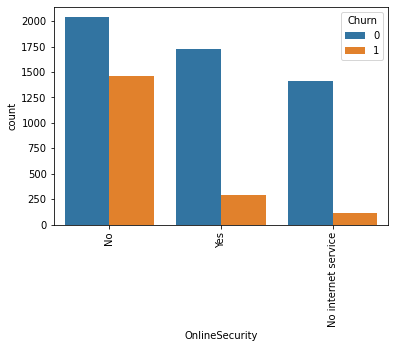

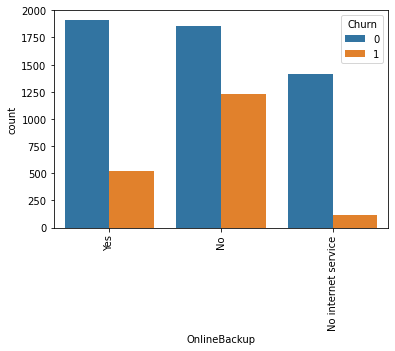

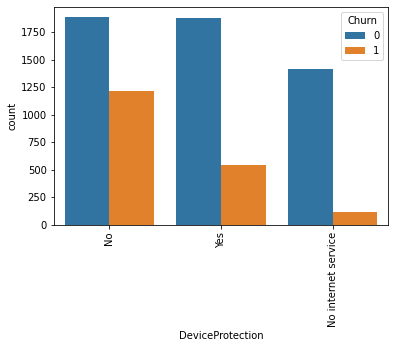

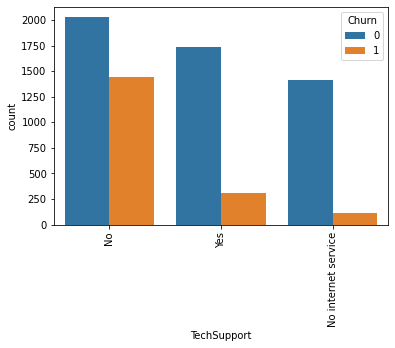

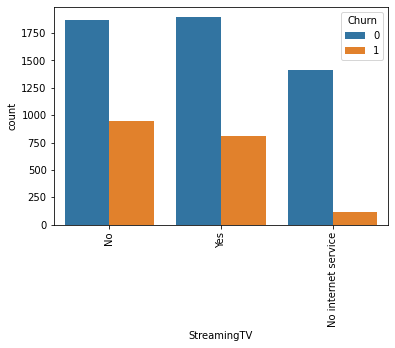

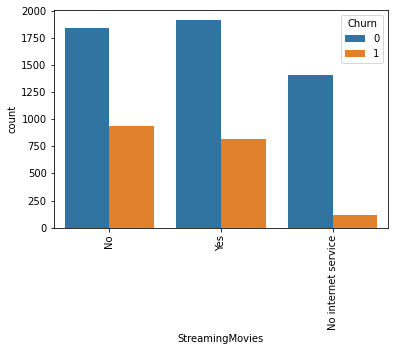

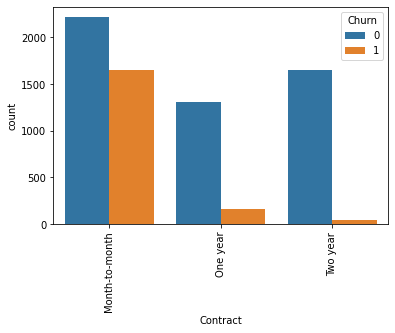

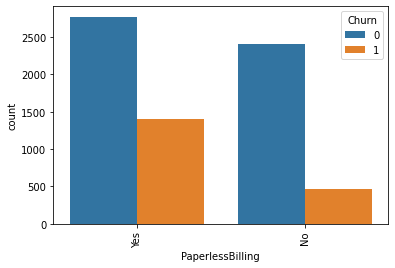

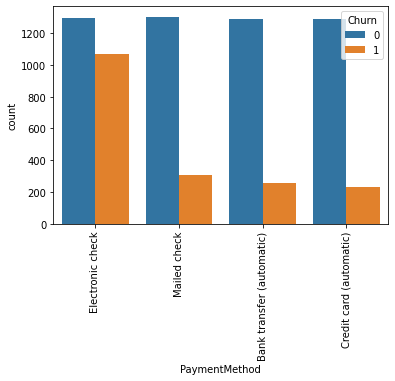

In [15]:
for feature in categorical:     
    sns.countplot(x= feature, hue = 'Churn', data=df)
    plt.xticks(rotation='vertical')
    plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

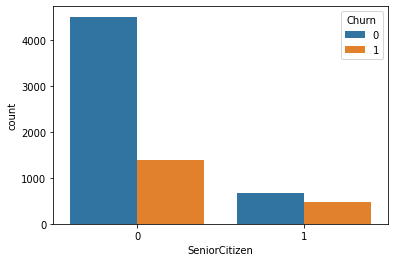

In [16]:
sns.countplot(x='SeniorCitizen' , hue='Churn' , data=df)

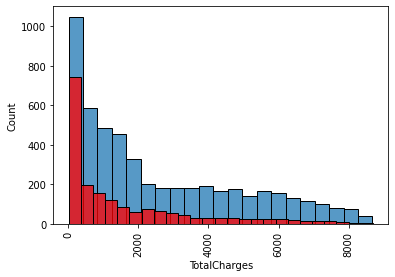

In [17]:
sns.histplot(df[df['Churn'] ==0]['TotalCharges'])
sns.histplot(df[df['Churn'] ==1]['TotalCharges'] , color='red')
plt.xticks(rotation='vertical')
plt.show()

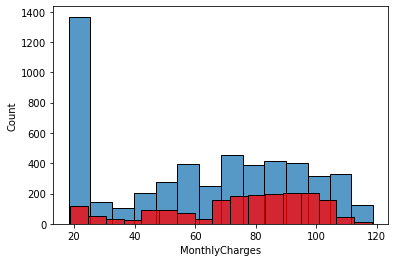

In [18]:
sns.histplot(df[df['Churn'] ==0]['MonthlyCharges'])
sns.histplot(df[df['Churn'] ==1]['MonthlyCharges'] , color='red')
plt.show()

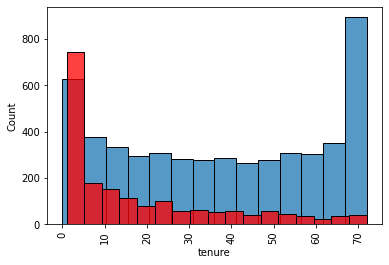

In [19]:
sns.histplot(df[df['Churn'] ==0]['tenure'])
sns.histplot(df[df['Churn'] ==1]['tenure'] , color='red')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Raihan\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

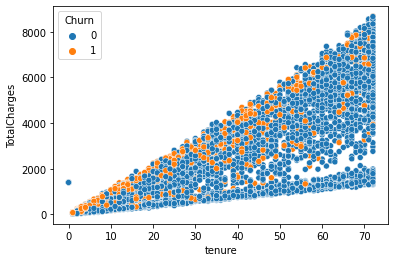

In [20]:
sns.scatterplot(df['tenure'],df['TotalCharges'],hue=df['Churn'])

C:\Users\Raihan\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

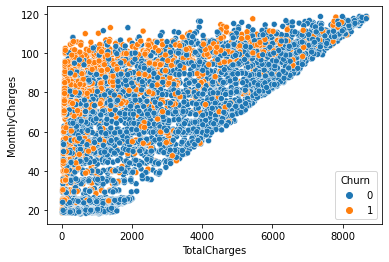

In [21]:
sns.scatterplot(df['TotalCharges'],df['MonthlyCharges'],hue=df['Churn'])

<AxesSubplot:>

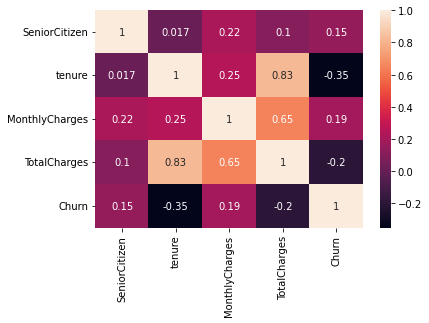

In [22]:
sns.heatmap(df.corr() , annot=True)

In [23]:
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [24]:
from sklearn.preprocessing import  LabelEncoder , StandardScaler ,MinMaxScaler
from sklearn.compose import ColumnTransformer

In [25]:
encoder = LabelEncoder()

In [26]:
df[categorical] = df[categorical].apply(lambda col: encoder.fit_transform(col))

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Churn']),df['Churn'],
                                                test_size=0.2)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)
prediction_1 = lr.predict(X_test)
accuracy_score(y_test, prediction_1)

0.7984386089425124

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
prediction_2= rf_classifier.predict(X_test)
accuracy_score(y_test, prediction_2)

0.7955997161107168

In [41]:
import numpy as np
# features = [[gender	SeniorCitizen	Partner	Dependents	tenure	PhoneService	MultipleLines	
# InternetService	OnlineSecurity	OnlineBackup	DeviceProtection	
# TechSupport	StreamingTV	StreamingMovies	Contract	PaperlessBilling	PaymentMethod	MonthlyCharges	TotalCharges]]
features = np.array([[1,0,0,0,3,0,0,1,0,0,0,1,1,1,1,1,2,345,5500]])
rf_classifier.predict(features)

array([0])